<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_78_Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 78: Logistic Regression - Gradient Descent


 **WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|Logistic Regression - Gradient Descent|
|||
|**Class Description**|In this class, a student learns to apply the gradient descent algorithm to calculate the optimum values of the coefficients|
|||
|**Class**|C78|
|||
|**Class Time**|45 minutes|
|||
|**Goal**|Create regularised cost function in Python|
||Create gradient descent function in Python|
||Get the optimum values of betas using the gradient descent algorithm|
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Warm-up Quiz

```
TEACHER
I have an exciting quiz question for you! Are you ready to answer this question?

EXPECTED STUDENT RESPONSE
Yes.
```

**Instructions for the Teacher:**
- Please click on the "Quiz Time" button on the bottom right corner of your screen to start the In-Class Quiz. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/quiz-time.png' width = 150>

- A quiz will be visible to both you and the student. Encourage the student to answer the quiz question.

- The student may choose the wrong option, help the student to think correctly about the question and then answer again.

- After the student selects the correct option, the "End Quiz" button will start appearing on your screen. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/end-quiz.png' width = 150>  

- Click the "End quiz" button to close the quiz pop-up and continue the class.
  
- Do not spend more than 2 minutes on this quiz.

---

### Teacher-Student Activities

In the previous classes, you learnt to compute the partial derivatives of the regularised cost function wrt all the betas i.e. $\frac{\partial J}{\partial \beta_0}, \frac{\partial J}{\partial \beta_1}, \frac{\partial J}{\partial \beta_2}, \dots, \frac{\partial J}{\partial \beta_n}$ and to create a surface plot for a function dependent on two independent variables; in this case, a regularised cost function dependent on $\beta_1$ and $\beta_2$.

In this class, you will learn to use these partial derivatives in Python to find the optimum beta values by building a gradient descent algorithm in Python.

Let's quickly go through the activities covered in the previous class and begin this class from **Activity 1: The Gradient Descent Algorithm** section.


---

#### Dummy Dataset



In [ ]:
# Dummy dataset creation using the 'make_blob()' function.
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

features_array, target_array = make_blobs(n_samples = 1000, centers = 2, n_features = 2, random_state = 42, cluster_std = 1.25)

# Object-type of the arrays created by the 'make_blob()' function and the number of rows and columns in them.
print(f"The features array is an {type(features_array)} object.\nThe target array is an {type(target_array)} object.\n")
print(f"The features array has {features_array.shape[0]} rows and {features_array.shape[1]} columns.")
print(f"The target array has {target_array.shape[0]} rows and {len(target_array.shape)} column.")

# Pandas DataFrame creation.
dummy_dict = {'col 1': [features_array[i][0] for i in range(features_array.shape[0])],
             'col 2': [features_array[i][1] for i in range(features_array.shape[0])],
             'target': target_array}

dummy_df = pd.DataFrame.from_dict(dummy_dict)

# The number of occurrences of each label in the 'target' column.
print(f"Target counts:\n{dummy_df['target'].value_counts()}")

The features array is an <class 'numpy.ndarray'> object.
The target array is an <class 'numpy.ndarray'> object.

The features array has 1000 rows and 2 columns.
The target array has 1000 rows and 1 column.
Target counts:
1    500
0    500
Name: target, dtype: int64


---

#### Calculating Coefficients Using `sklearn` Module

Beta 0 = 6.3267
Beta 1 = 1.4679
Beta 2 = -1.3607


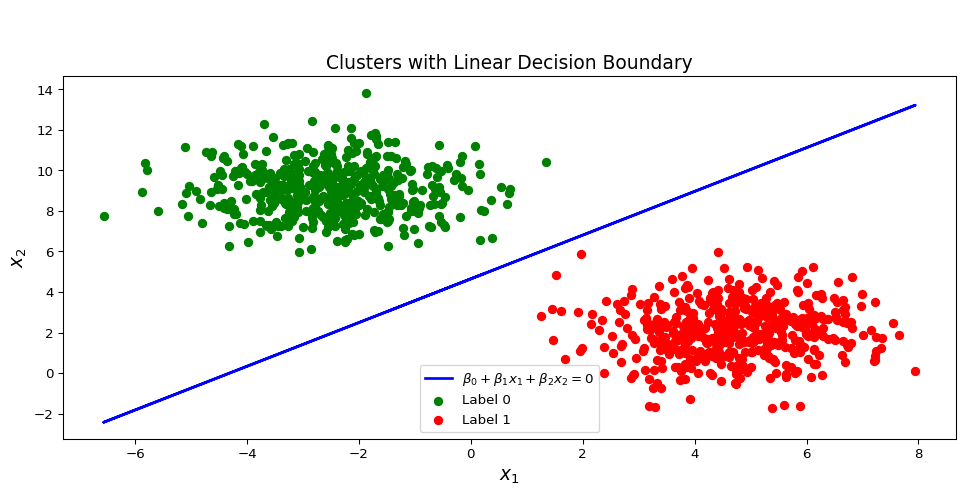

In [ ]:
# Coefficients Estimation by building a logistic regression model using the 'sklearn' module.
from sklearn.linear_model import LogisticRegression

X = dummy_df[dummy_df.columns[:-1]] # Features
y = dummy_df['target'] # Target

def decision_boundary_coeffs(X, y):
  logistic_reg = LogisticRegression(random_state=0).fit(X, y)
  coef_list = list(logistic_reg.intercept_) + list(logistic_reg.coef_[0])
  return coef_list

coef_list = decision_boundary_coeffs(X, y)
for i in range(len(coef_list)):
  print(f"Beta {i} = {coef_list[i]:.4f}")

# Plotting the decision boundary
pred_col2_values = - (coef_list[0] + coef_list[1] * dummy_df['col 1']) / coef_list[2]

plt.figure(figsize = (12, 5), dpi = 96)
plt.title("\n\nClusters with Linear Decision Boundary", fontsize = 14)
plt.scatter(dummy_df.loc[dummy_df['target'] == 0, 'col 1'], dummy_df.loc[dummy_df['target'] == 0, 'col 2'], label = 'Label 0', color = 'g')
plt.scatter(dummy_df.loc[dummy_df['target'] == 1, 'col 1'], dummy_df.loc[dummy_df['target'] == 1, 'col 2'], label = 'Label 1', color = 'r')
plt.plot(dummy_df['col 1'], pred_col2_values, color = 'b', linewidth = 2, label = r"$\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$")
plt.xlabel(r"$x_1$", fontsize = 14)
plt.ylabel(r"$x_2$", fontsize = 14)
plt.legend()
plt.show()

In [ ]:
# First three values of 'target_array'.
print(target_array[:3])

# Last three values of 'target_array'.
print(target_array[-3:])

[0 1 1]
[1 1 0]


---

#### Derivative of Regularised Cost Function

The regularised cost function.

\begin{equation}
J = - \frac{1}{m} \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i)) + \frac{\lambda}{2m}(\beta_1^2 + \beta_2^2 + \dots + \beta_n^2)\\
\end{equation}

The partial derivatives

\begin{align}
\frac{\partial J}{\partial \beta_0} &=  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i) \\
\frac{\partial J}{\partial \beta_1} &=  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_1 + \frac{\lambda}{m} \beta_1 \\
\end{align}

In general, for $\beta_j = \beta_1$ to $\beta_n$
\begin{equation}
\frac{\partial J}{\partial \beta_j} =  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_j + \frac{\lambda}{m} \beta_j \\
\end{equation}

---

#### Activity 1: The Gradient Descent Algorithm

**What is a gradient?**

A gradient is just another word for the slope of a straight line. In short,

$$\text{gradient} = \frac{dy}{dx} = \text{slope of a straight line}$$

It is just another name for derivatives.


**What is gradient descent?**

The gradient descent algorithm is a technique used to find the point of the minimum value of a cost function to further compute the optimum values of betas. The term "gradient descent" literally means that you are going in the direction where the slope of a tangent of a cost function is descending or decreasing.

**How the gradient descent algorithm locates the point of minimum value of a function?**

The gradient descent algorithm,

- Calculates a gradient or slope of a tangent to the cost function curve at some initial arbitrary points on the curve.

  Let's assume that the graph between the cost function and $\beta_0$ only follows the curve shown below.

  <center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/grad-descent-01.jpg' width = 600></center>

  The tangent and its slope at some arbitrary point $\beta_0$ is also shown in the curve

- Refactors the gradients obtained by multiplying them with some arbitrary value called learning rate denoted by $\alpha$ and subtracts the refactored value from the initial points on the curve
  
  To get the new value of $\beta_0$, the previous slope i.e. $\frac{\partial J}{\partial \beta_0}$ is multiplied with $\alpha$ and the initial $\beta_0$ is replaced by $\beta_0 - \alpha \frac{\partial J}{\partial \beta_0}$

  <center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/grad-descent-02.jpg' width = 600></center>

  The tangent and its slope at the new $\beta_0$ point is also shown in the curve. As you might have noticed, $\alpha$ is used to get a new value of $\beta_0$. Suppose the initial value of $\beta_0$ is $10$, $\frac{\partial J}{\partial \beta_0} = 4$ and $\alpha = 0.1$. So new value of $\beta_0$ becomes $\beta_0 = 10 - 0.1 \times 4 = 9.6$. Then let $\frac{\partial J}{\partial \beta_0} = 2.5$, so $\beta_0 = 9.6 - 0.1 \times 2.5 = 9.35$ and so on until $\frac{\partial J}{\partial \beta_0} = 0$

- Repeats the above steps until the lowest point on the curve is obtained
  
  <center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/grad-descent-03.jpg' width = 600></center>

  <center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/grad-descent-04.jpg' width = 600></center>

  <center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/grad-descent-05.jpg' width = 600></center>

  As you can see, the tangent gradually shifted to the point of minimum value of the regularised cost function wrt $\beta_0$ only. Similarly, you can visualise the above graph for $J$ as a function of $\beta_1$ and $\beta_2$ individually. In all the cases, the tangent will converge to the point of minimum value of the regularised cost function.

To implement the gradient descent algorithm, you need to go through the following steps:

1. Select some random values of betas, say $\beta_0 = 0, \beta_1 = 0$ and $\beta_2 = 0$

2. Compute the gradient or slope of a tangent on those points i.e. $\frac{\partial J}{\partial \beta_0}, \frac{\partial J}{\partial \beta_1}$ and $\frac{\partial J}{\partial \beta_2}$ at the points $\beta_0 = 0, \beta_1 = 0$ and $\beta_2 = 0$

3. Multiply the values obtained in the second step with $\alpha$ i.e. $\alpha \frac{\partial J}{\partial \beta_0}, \alpha \frac{\partial J}{\partial \beta_1}$ and $\alpha \frac{\partial J}{\partial \beta_2}$

4. Subtract the values obtained in the third step with the initial values of betas i.e. $\beta_0 - \alpha \frac{\partial J}{\partial \beta_0}, \beta_1 - \alpha \frac{\partial J}{\partial \beta_1}$ and $\beta_2 - \alpha \frac{\partial J}{\partial \beta_2}$

5. Replace the initial values of betas with the ones obtained in the fourth step i.e. $\beta_0 = \beta_0 - \alpha \frac{\partial J}{\partial \beta_0}, \beta_1 = \beta_1 - \alpha \frac{\partial J}{\partial \beta_1}$ and $\beta_2 = \beta_2 - \alpha \frac{\partial J}{\partial \beta_2}$

6. Repeat the above steps until the $\beta_0, \beta_1$ and $\beta_2$ values are obtained such that $J(\beta_0, \beta_1, \beta_2)$ is minimum.

Without further ado, let's learn the gradient descent algorithm in action.


---

#### Activity 2: Pre-requisites^

We need to create a regularised cost function in Python for the dummy dataset that has two columns. Hence, in this case, the regularised cost function becomes

\begin{equation}
J = - \frac{1}{m} \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i)) + \frac{\lambda}{2m}(\beta_1^2 + \beta_2^2)
\end{equation}

And their partial derivatives wrt $\beta_0, \beta_1$ and $\beta_2$ are given by

\begin{align}
\frac{\partial J}{\partial \beta_0} &=  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i) \\
\frac{\partial J}{\partial \beta_1} &=  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_1 + \frac{\lambda}{m} \beta_1 \\
\frac{\partial J}{\partial \beta_2} &=  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_2 + \frac{\lambda}{m} \beta_2 \\
\end{align}

But before that, you need the following:

1. An array containing features (independent variables) which you already have. It is stored in the `features_array` variable. You need to add another column to this array having all the values as 1. For this, you can use the `append()` function of the `numpy` module. Its **syntax** is

   `np.append(array1, array2, axis)`

   where

   - `array1` is the array in which you want to add the values of `array2`
   
   - `axis = 0` denotes that you want to add values row-wise or horizontally
   
   - `axis = 1` denotes that you want to add values column-wise or vertically.


2. An array containing the target (dependent variable) which also we already have. It is stored in the `target_array` variable.

3. An array containing some random initial values of betas.

4. A sigmoid function in Python.




In [ ]:
# S2.1: Go through all the above preparation steps.

# Import the numpy module.
import numpy as np

# Create a new features array by adding a column (containing all 1s) to the original features array.
X = np.append(np.ones((features_array.shape[0], 1)), features_array, axis = 1)
y = target_array

# Print the feature array and target array.
print(f"Features array:\n{X[:10]}\n\nTarget array:\n{y[:10]}")

# Get the number of records and features.
m, n = X.shape[0], X.shape[1] # 'm' is the total number of records and 'n' is the total number of features.

# Create the initial coefficients array.
initial_beta = np.zeros(shape = (1, n)) # Initial beta_0 = 0, beta_1 = 0 and beta_2 = 0
print("\nInitial beta:\n", initial_beta)

# Create the sigmoid function.
def sigmoid(h):
  return 1/(1 + np.exp(-h))

Features array:
[[ 1.         -1.46458248  7.60215256]
 [ 1.          6.73700485  1.28118438]
 [ 1.          3.26953498  0.17310608]
 [ 1.          5.2934232   1.25604468]
 [ 1.          4.41427894  5.96455414]
 [ 1.          5.85887587  2.5995374 ]
 [ 1.          5.37324609  1.37954011]
 [ 1.         -2.26354616  9.90054083]
 [ 1.          3.42530792  0.24864698]
 [ 1.         -2.55060634 11.25748346]]

Target array:
[0 1 1 1 1 1 1 0 1 0]

Initial beta:
 [[0. 0. 0.]]


---

#### Activity 3: Regularised Cost Function in Python^^

Let's create the function in Python that will return the gradient (or slope of a tangent to the regularised cost function curve) for a set of values of $\beta_0, \beta_1$ and $\beta_2$ and the value of the regularised cost function for these values of betas.

1. Let's name it `reg_cost_function()` and it takes the following four inputs:
  * Coefficients $\beta$
  * Features array
  * Target array
  * Regularisation rate $\lambda$
  
2. Inside the function, first, determine the total number of records in the feature array and store it in a variable called `m`.

3. Calculate the probabilities for hypothesis which is a linear equation $\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2}$ and store it in a variable called `probs`.

4. Calculate the error using the log likelihood function for one record and store it in a variable. Let's name the variable as `error`.
   
   $$\text{error} = y \log p + (1 - y) \space{} \log(1 - p)$$

5. Calculate the value of the regularised cost for a set of $\beta_0, \beta_1, \beta_2$ values and store it in a variable. Let's name the variable as `cost`.

   $$J(\beta_0, \beta_1, \beta_2) = -\frac{1}{m} \sum_{i = 1}^m \{ y_i \log p_i + (1 - y_i) \log(1 - p_i) \} + \frac{\lambda}{2m}(\beta_1 ^2 + \beta_2 ^2)$$

   where

   $$p_i = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2})}}$$

6. Create an array to store the partial derivatives or gradients. Set their initial values to 0. Let's store this array in the `grad` variable.

7. Create a `for` loop to calculate the partial derivatives or gradients of the regularised cost function wrt $\beta_0, \beta_1$ and $\beta_2$ one-by-one and store them in the `grad` variable.


In [ ]:
# S3.1: Create the regularised cost function.

def reg_cost_function(beta, X, y, reg_rate):
  m = X.shape[0] # Total number of records
  probs = sigmoid(np.matmul(beta, np.transpose(X)))
  error = y.reshape(1, m) * np.log(probs) + (1 - y.reshape(1, m)) * np.log(1 - probs)
  cost = (-1 / m) * np.sum(error) + (reg_rate / (2 * m)) * np.sum(beta[:, 1:] ** 2)
  grad = np.zeros((1, X.shape[1]))
  for i in range(beta.shape[1]):
    grad[0][i] = (1 / m) * np.matmul(probs - y.reshape(1, m), X[:, i])
  return cost, grad

In the above code:

- The `np.matmul(beta, np.transpose(X))` multiplies the $B = \begin{bmatrix} \beta_0 & \beta_1 & \beta_2\end{bmatrix}$ matrix with the $X = \begin{bmatrix}1 & x_{11} & x_{12} \\ 1 & x_{21} & x_{22} \\ 1 & x_{31} & x_{32} \\ \vdots & \vdots & \vdots\\ 1 & x_{10001} & x_{10002} \end{bmatrix}$ matrix i.e. $BX^T$

- The `sigmoid(np.matmul(beta, np.transpose(X)))` part calculates the probabilities i.e. $p = \frac{1}{1 + e^{-BX^T}}$

- The `error` variable stores the $y_i \log p_i + (1 - y_i) \log (1 - p_i)$ the log likelihood function.

- The `cost` variable stores the regularised cost function $-\frac{1}{m} \sum_{i = 1}^m \{ y_i \log p_i + (1 - y_i) \log(1 - p_i) \} + \frac{\lambda}{2m}(\beta_1 ^2 + \beta_2 ^2)$ value

- The `for` loop
  ```
  for i in range(beta.shape[1]):
    grad[0][i] = (1 / m) * np.matmul(probs - y.reshape(1, m), X[:, i])
  ```
  calculates $\frac{\partial J}{\partial \beta_0} = \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i), \frac{\partial J}{\partial \beta_1} = \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_1 + \frac{\lambda}{m} \beta_1$ and $\frac{\partial J}{\partial \beta_2} = \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_2 + \frac{\lambda}{m} \beta_2$ values

  where

  `grad[0][0] = (1 / m) * np.matmul(probs - y.reshape(1, m), X[:, 0])` denotes $\frac{\partial J}{\partial \beta_0}$

  `grad[0][1] = (1 / m) * np.matmul(probs - y.reshape(1, m), X[:, 1])`

  `grad[0][2] = (1 / m) * np.matmul(probs - y.reshape(1, m), X[:, 2])`


Now, let's calculate the gradients and the value of the regularised cost function for the initial values of betas and $\lambda = 10$.

In [ ]:
# S3.2: Calculate the gradients and the value of the regularised cost function for the initial values of betas and 𝜆 = 10.
cost, grad = reg_cost_function(initial_beta, X, y, 10)
print("\nThe value of the cost function at initial betas is", cost)
print("\nThe gradients at initial beta (zeros):\n", grad)


The value of the cost function at initial betas is 0.6931471805599454

The gradients at initial beta (zeros):
 [[ 0.         -1.80373398  1.74634403]]


----

#### Activity 4: Gradient Descent Function in Python^^^

Now let's create a Python function to implement the gradient descent algorithm in Python that will calculate the partial derivatives of the regularised cost function in Python for a fixed number of iterations and ultimately will find the points i.e. the values $\beta_0, \beta_1$ and $\beta_2$ for which the slope of the tangent to the regularised cost function is 0.

1. Let's name this function as `gradient_descent()` function that will take the following 6 inputs:
   - Features array
   - Target array
   - Coefficients array
   - Learning rate $\alpha$
   - Number of iterations
   - Regularisation rate

   And returns the optimum values of betas and a list of values of the regularised cost function for different values of betas (including the optimum values of betas).

2. Create an empty Python list to store different values of the regularised cost function for different values of betas.

4. Create a `for` loop that runs for the maximum number of iterations specified and at each iteration calculates the

   - value of the regularised cost function for $\beta_0, \beta_1$ and $\beta_2$

   - gradients i.e. $\frac{\partial J}{\partial \beta_0}, \frac{\partial J}{\partial \beta_1}$ and $\frac{\partial J}{\partial \beta_2}$

   - new values of $\beta_0, \beta_1$ and $\beta_2$

In [ ]:
# S4.1: Create the gradient descent function.
def gradient_descent(X, y, beta, learn_rate, num_iters, reg_rate):
  m = X.shape[0]
  cost_func_values = []
  for i in range(num_iters):
    cost, grad = reg_cost_function(beta, X, y, reg_rate)
    beta[0][0] = beta[0][0] - learn_rate * grad[0][0]
    beta[0][1] = beta[0][1] - learn_rate * (grad[0][1] + reg_rate * beta[0][1] / m)
    beta[0][2] = beta[0][2] - learn_rate * (grad[0][2] + reg_rate * beta[0][2] / m)
    cost_func_values.append(cost)

  return beta, cost_func_values

In the above code:

- The `beta[0][0] = beta[0][0] - learn_rate * grad[0][0]` part calculates

  $$\beta_0 = \beta_0 - \alpha  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)$$

- The `beta[0][1] = beta[0][1] - learn_rate * (grad[0][1] + reg_rate * beta[0][1] / m)` part calculates

  $$\beta_1 = \beta_1 - \alpha  \left( \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_1 + \frac{\lambda}{m} \beta_1 \right)$$

- The `beta[0][2] = beta[0][2] - learn_rate * (grad[0][2] + reg_rate * beta[0][2] / m)` part calculates

  $$\beta_2 = \beta_2 - \alpha  \left( \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_2 + \frac{\lambda}{m} \beta_2 \right)$$

Let's run the `gradient_descent()` function for 50,000 iterations. Let the learning rate, $\alpha$ be 2 and the regularisation rate, $\lambda$ be 1.  

In [ ]:
# S4.2 Run the gradient descent function for 50,000 iterations, learning rate = 2 and regularisation rate = 1.
opt_beta, cost_func_values = gradient_descent(X, y, initial_beta, 2, 50000, 1)
print("\nThe beta optimised by gradient descent:\n", opt_beta)
print("\nThe value of the cost function at the optimised beta:", cost_func_values[-1])


The beta optimised by gradient descent:
 [[ 6.31795666  1.46867581 -1.35944476]]

The value of the cost function at the optimised beta: 0.003137065537016717


As you can observe, we have obtained the optimum values of betas for which the value of the regularised cost function is minimum. These values of betas are almost the same as obtained using the `LogisticRegression` class of the `sklearn` module.

So you have seen how logistic regression (a classification-based machine learning algorithm) tries to calculate a decision boundary to separate the labels from each other behind the scenes. We considered an ideal example of only two features to visualise a linear decision boundary. In real-world cases, we have more than two features. Hence,  the decision boundary is much more complicated and is difficult to visualise in the same way. In fact, even in the case of two features, a decision boundary can be a circle, a parabola, hyperbola or any other non-linear curve.

Let's stop here. In the next class, we will finally build a logistic regression model that can accurately classify whether a patient has heart disease or not.

---

#### Activities

**Teacher Activities:**

1. Logistic Regression - Gradient Descent (Class Copy)  

   Link on Panel

2. Logistic Regression - Gradient Descent (Reference)

   Link on Panel
   

---